### **Tarea: Métrica del Sentimiento Acumulado** ###

Matemáticas y Estadística para Inteligencia Artificial

**Alumno**: Aminadab Córdova Acosta


Instrucciones

En esta tarea utilizaremos la integración definida y la integración numérica para comparar resultados exactos y aproximados del valor de una integral

La semana pasada estuvimos trabajando con datos que simulaban la disposición de ciertos usuarios para comprar un producto determinado. A este comportamiento se le conoce como "análisis de sentimiento". Con estos datos se puede calcular el impacto total de sentimiento de un grupo de usuarios. Esto nos daría la acumulación total de la probabilidad de compra en cierto rango de salarios. Con esto podemos identificar qué grupo de ingresos es el mejor objetivo de marketing y ajustar estrategias de precio según la capacidad de compra.

Si los tenemos los datos de los salarios si y la probabilidad de compra p(s) en un intervalo s∈[a,b] de salarios, podemos calcular el impacto de sentimiento como 

$$I = \int_{a}^{b} p(s) \,ds$$

1. Para los datos que utilizó en la tarea anterior calcule el impacto de sentimiento I en el intervalo de salarios dados utilizando:Compare los resultados obtenidos en la pregunta anterior
    - El método de sumas de Riemann
    - El método de los trapecios
    - Integrando directamente la función $$ p(s) = \frac{1}{1 + e^{-(s - s_0)}} $$
    donde $s_0$ es el punto que escogió para obtener el desarrollo de Taylor.
    - Integrando directamente la aproximación de Taylor obtenida en la tarea anteior para la función  p(s)
2. Compare los resultados obtenidos en la pregunta anterior

Dos integraciones numéricas

- Método de Riemman
- Método de Trapecios

Integral definida

Integral del polinomio de Taylor


0.3350000000000001


(0.0, 1.0)

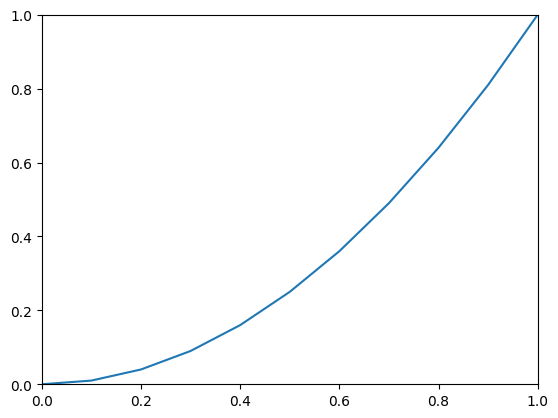

In [5]:
import numpy as np
import matplotlib.pyplot as plt

a=0
b=1
N = 10

x = np.linspace(a,b,N+1)
y = x**2

y_right = y[1:]
y_left = y[:-1]

# Trapezoidal rule
dx = (b-a)/N
A = (dx/2)*(np.sum(y_right + y_left)) 

print(A)

plt.plot(x,y)
plt.xlim([0,1]); plt.ylim([0,1])

In [6]:
import numpy as np

a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_riemannL = h * sum(f[:n-1])
err_riemannL = 2 - I_riemannL

I_riemannR = h * sum(f[1::])
err_riemannR = 2 - I_riemannR

I_mid = h * sum(np.sin((x[:n-1] \
        + x[1:])/2))
err_mid = 2 - I_mid

print(I_riemannL)
print(err_riemannL)

print(I_riemannR)
print(err_riemannR)

print(I_mid)
print(err_mid)

1.9835235375094546
0.01647646249054535
1.9835235375094546
0.01647646249054535
2.0082484079079745
-0.008248407907974542


# Integral de la función \( p(s) \) por el método de Riemann

Dada la función sigmoide:

$$ p(s) = \frac{1}{1 + e^{-(s - s_0)}} $$

Queremos calcular la integral definida en un intervalo \([a, b]\) utilizando la suma de Riemann:

$$ I = \int_a^b p(s) \, ds $$

Dividimos el intervalo \([a, b]\) en \( n \) subintervalos de ancho \( \Delta s \):

$$ \Delta s = \frac{b - a}{n} $$

Aproximamos la integral con la suma de Riemann en el punto medio:

$$ I \approx \sum_{i=0}^{n-1} p(s_i) \cdot \Delta s $$

donde \( s_i \) son los puntos medios de cada subintervalo:

$$ s_i = a + \left(i + \frac{1}{2}\right) \Delta s $$




In [7]:
import numpy as np

def p(s, s0):
    return 1 / (1 + np.exp(-(s - s0)))

def riemann_integral(a, b, s0, n=1000):
    """Calcula la integral de p(s) en [a, b] usando la suma de Riemann."""
    delta_s = (b - a) / n
    s_values = np.linspace(a + delta_s / 2, b - delta_s / 2, n)  # Puntos medios
    integral = np.sum(p(s_values, s0) * delta_s)
    return integral

# Definir los valores
a, b = -5, 5  # Intervalo de integración
s0 = 0        # Parámetro de la función sigmoide
n = 1000      # Número de subintervalos

resultado = riemann_integral(a, b, s0, n)
print(f"Valor aproximado de la integral: {resultado:.6f}")


Valor aproximado de la integral: 5.000000


# Integral de la función \( p(s) \) por el método de los trapecios

Dada la función sigmoide:

$$ p(s) = \frac{1}{1 + e^{-(s - s_0)}} $$

Queremos calcular la integral definida en un intervalo \([a, b]\) utilizando la **regla del trapecio**, que se define como:

$$ I \approx \frac{\Delta s}{2} \sum_{i=0}^{n} \left[ p(s_i) + p(s_{i+1}) \right] $$

donde:


- Los puntos de partición en el intervalo \([a, b]\) están dados por:  
  $$ s_i = a + i \Delta s $$  

- El ancho de cada subintervalo es:  
  $$ \Delta s = \frac{b - a}{n} $$  

- Se suman los valores de la función en los extremos de cada trapecio y se multiplican por:  
  $$ \frac{\Delta s}{2} $$  




In [8]:
## Código en Python
import numpy as np

def p(s, s0):
    return 1 / (1 + np.exp(-(s - s0)))

def trapezoidal_integral(a, b, s0, n=1000):
    """Calcula la integral de p(s) en [a, b] usando la regla del trapecio."""
    delta_s = (b - a) / n
    s_values = np.linspace(a, b, n+1)  # Puntos de partición
    integral = (delta_s / 2) * np.sum(p(s_values[:-1], s0) + p(s_values[1:], s0))
    return integral

# Definir los valores
a, b = -5, 5  # Intervalo de integración
s0 = 0        # Parámetro de la función sigmoide
n = 1000      # Número de subintervalos

resultado = trapezoidal_integral(a, b, s0, n)
print(f"Valor aproximado de la integral: {resultado:.6f}")

Valor aproximado de la integral: 5.000000


Integral directa

In [9]:
import sympy as sp

# Definir la variable y la función
s, s0 = sp.symbols('s s0')
p_s = 1 / (1 + sp.exp(-(s - s0)))

# Calcular la integral simbólicamente
integral_p = sp.integrate(p_s, s)

# Mostrar el resultado
sp.pretty_print(integral_p)


       ⎛ -s + s₀    ⎞
s + log⎝ℯ        + 1⎠


In [10]:
integral_p

s + log(exp(-s + s0) + 1)

**Referencias**

1. Qingkai Kong, Timmy Siauw, Alexandre Bayen. Python Programming and Numerical Methods A Guide for Engineers and Scientists. https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/Index.html

2. Richard L. Burden, J. Douglas Faires. Numerical Analysis. Brooks/Cole CENGAGE Learning

